## Unit 6 | Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_ 

But, if pressed, how would you **prove** it? 

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls. 
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must use the Matplotlib and Seaborn libraries.
* You must include a written description of three observable trends based on the data. 
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
* You must include an exported markdown version of your Notebook called  `README.md` in your GitHub repository.  
* See [Example Solution](WeatherPy_Example.pdf) for a reference on expected format. 

## Hints and Considerations

* You may want to start this assignment by refreshing yourself on 4th grade geography, in particular, the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm). 

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* Though we've never worked with the [citipy Python library](https://pypi.python.org/pypi/citipy), push yourself to decipher how it works, and why it might be relevant. Before you try to incorporate the library into your analysis, start by creating simple test cases outside your main script to confirm that you are using it correctly. Too often, when introduced to a new library, students get bogged down by the most minor of errors -- spending hours investigating their entire code -- when, in fact, a simple and focused test would have shown their basic utilization of the library was wrong from the start. Don't let this be you!

* Part of our expectation in this challenge is that you will use critical thinking skills to understand how and why we're recommending the tools we are. What is Citipy for? Why would you use it in conjunction with the OpenWeatherMap API? How would you do so?

* In building your script, pay attention to the cities you are using in your query pool. Are you getting coverage of the full gamut of latitudes and longitudes? Or are you simply choosing 500 cities concentrated in one region of the world? Even if you were a geographic genius, simply rattling 500 cities based on your human selection would create a biased dataset. Be thinking of how you should counter this. (Hint: Consider the full range of latitudes).

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!

In [1]:
#Standard imports

import pandas as pd
import requests as r
import json
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [2]:
# Point to csv file containing city ID

file = 'cityid.csv'

In [3]:
#Load in CSV file into Pandas

df = pd.read_csv(file, encoding='utf-8', low_memory=False)

In [4]:
#Select a random sample of 500 cities into pandas and store values in a list. 
city_list = df.sample(500).reset_index()['id'].tolist()

#Set up API url using end point and key.
url = 'http://api.openweathermap.org/data/2.5/weather?id='
api_key = '&APPID=0c715aff73757bce5f32aba6da14fd45'
units = '&units=imperial'

#Generate list of all end points based on city id.
url_list = [(url + str(city) + units + api_key) for city in city_list]

#Genearte a dictionary of city ID and end point.
url_dict = {'city_id': city_list, 'url': url_list}

#Load resulting dictionary into Pandas
city_df = pd.DataFrame(url_dict)

In [5]:
#Add columns to dataframe

city_df['city'] = ''
city_df['country'] = ''
city_df['lat'] = ''
city_df['lon'] = ''
city_df['temp'] = ''
city_df['wind'] = ''
city_df['clouds'] = ''
city_df['humidity'] = ''

In [6]:
#Display head of dataframe

city_df.head()

,city_id,url,city,country,lat,lon,temp,wind,clouds,humidity
0,5112038,http://api.openweathermap.org/data/2.5/weather...,,,,,,,,
1,1485020,http://api.openweathermap.org/data/2.5/weather...,,,,,,,,
2,3775262,http://api.openweathermap.org/data/2.5/weather...,,,,,,,,
3,2989918,http://api.openweathermap.org/data/2.5/weather...,,,,,,,,
4,2265686,http://api.openweathermap.org/data/2.5/weather...,,,,,,,,


In [7]:
#Confirm that city id in url matches the city id from dataframe

city_df['url'][4]

'http://api.openweathermap.org/data/2.5/weather?id=2265686&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45'

In [8]:
#Confirm that city id in url matches the city id from dataframe

city_df.iloc[4]

city_id                                               2265686
url         http://api.openweathermap.org/data/2.5/weather...
city                                                         
country                                                      
lat                                                          
lon                                                          
temp                                                         
wind                                                         
clouds                                                       
humidity                                                     
Name: 4, dtype: object

In [9]:
#Set up loop to ping end point and return values from json

#Set up for loop to loop through dataframe
i = 0
print('------Start Collecting Data------')
for index, row in city_df.iterrows():
    response = r.get(row['url']).json()    
#     print(response)
    date_time_now = datetime.datetime.now()
    #now.strftime("%Y-%m-%d %H:%M")
    print('Record ' + str(i+1) + ' ' + 'Collected at: ' + date_time_now.strftime("%Y-%m-%d %H:%M"))
    print('City Name: ' + response['name'] + ', ' + 'Country Name: ' + response['sys']['country'])
    print(row['url'])
    print('--------------')

#Set up try/except blocks to populate dataframe based on structure of json    
    try:
        city_df.set_value(index, "city", response['name'])
        city_df.set_value(index, 'country', response['sys']['country'])
        city_df.set_value(index, 'lat', response['coord']['lat'])
        city_df.set_value(index, 'lon', response['coord']['lon'])
        city_df.set_value(index, 'temp', response['main']['temp_max'])
        city_df.set_value(index, 'wind', response['wind']['speed'])
        city_df.set_value(index, 'clouds', response['clouds']['all'])
        city_df.set_value(index, 'humidity', response['main']['humidity'])
    except:
        print("Missing field... skipping.")
    i += 1
print('------End Collecting Data------')

------Start Collecting Data------
Record 1 Collected at: 2017-12-16 06:28
City Name: Centerport, Country Name: US
http://api.openweathermap.org/data/2.5/weather?id=5112038&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 2 Collected at: 2017-12-16 06:28
City Name: Znamenskoye, Country Name: RU
http://api.openweathermap.org/data/2.5/weather?id=1485020&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 3 Collected at: 2017-12-16 06:28
City Name: Quipama, Country Name: CO
http://api.openweathermap.org/data/2.5/weather?id=3775262&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 4 Collected at: 2017-12-16 06:28
City Name: Noyal-Pontivy, Country Name: FR
http://api.openweathermap.org/data/2.5/weather?id=2989918&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 5 Collected at: 2017-12-16 06:28
City Name: Moura, Country Name: PT
http://api.openweathermap.org/data/2.5/weather?id=2265686&unit

Record 41 Collected at: 2017-12-16 06:28
City Name: Salvacion, Country Name: PH
http://api.openweathermap.org/data/2.5/weather?id=1690741&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 42 Collected at: 2017-12-16 06:28
City Name: Tambong, Country Name: PH
http://api.openweathermap.org/data/2.5/weather?id=1683541&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 43 Collected at: 2017-12-16 06:28
City Name: Cave, Country Name: IT
http://api.openweathermap.org/data/2.5/weather?id=3179288&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 44 Collected at: 2017-12-16 06:28
City Name: Kalajoki, Country Name: FI
http://api.openweathermap.org/data/2.5/weather?id=654837&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 45 Collected at: 2017-12-16 06:28
City Name: Vetroz, Country Name: CH
http://api.openweathermap.org/data/2.5/weather?id=2658146&units=imperial&APPID=0c715aff73757bce5f32aba6d

Record 81 Collected at: 2017-12-16 06:29
City Name: Okha, Country Name: RU
http://api.openweathermap.org/data/2.5/weather?id=2122614&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 82 Collected at: 2017-12-16 06:29
City Name: Zabok, Country Name: HR
http://api.openweathermap.org/data/2.5/weather?id=3186984&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 83 Collected at: 2017-12-16 06:29
City Name: Andong, Country Name: KR
http://api.openweathermap.org/data/2.5/weather?id=1846986&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 84 Collected at: 2017-12-16 06:29
City Name: Los Mochis, Country Name: MX
http://api.openweathermap.org/data/2.5/weather?id=3997479&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 85 Collected at: 2017-12-16 06:29
City Name: Cloverdale, Country Name: US
http://api.openweathermap.org/data/2.5/weather?id=4255948&units=imperial&APPID=0c715aff73757bce5f32aba

Record 121 Collected at: 2017-12-16 06:29
City Name: Dioknisi, Country Name: GE
http://api.openweathermap.org/data/2.5/weather?id=614897&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 122 Collected at: 2017-12-16 06:29
City Name: Carlentini, Country Name: IT
http://api.openweathermap.org/data/2.5/weather?id=2525349&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 123 Collected at: 2017-12-16 06:29
City Name: Muladbucad, Country Name: PH
http://api.openweathermap.org/data/2.5/weather?id=1699138&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 124 Collected at: 2017-12-16 06:29
City Name: La Junta, Country Name: US
http://api.openweathermap.org/data/2.5/weather?id=5427705&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 125 Collected at: 2017-12-16 06:29
City Name: Ledyard Center, Country Name: US
http://api.openweathermap.org/data/2.5/weather?id=4837648&units=imperial&APPID=0c71

Record 161 Collected at: 2017-12-16 06:29
City Name: Reyhanli, Country Name: TR
http://api.openweathermap.org/data/2.5/weather?id=302355&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 162 Collected at: 2017-12-16 06:29
City Name: Rodeo, Country Name: US
http://api.openweathermap.org/data/2.5/weather?id=5388467&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 163 Collected at: 2017-12-16 06:29
City Name: Saint-Julien-du-Sault, Country Name: FR
http://api.openweathermap.org/data/2.5/weather?id=2979080&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 164 Collected at: 2017-12-16 06:29
City Name: Nideggen, Country Name: DE
http://api.openweathermap.org/data/2.5/weather?id=2863711&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 165 Collected at: 2017-12-16 06:29
City Name: Saint Bonifacius, Country Name: US
http://api.openweathermap.org/data/2.5/weather?id=5044347&units=imperial&AP

Record 201 Collected at: 2017-12-16 06:30
City Name: Santiago del Estero, Country Name: AR
http://api.openweathermap.org/data/2.5/weather?id=3835869&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 202 Collected at: 2017-12-16 06:30
City Name: Cateel, Country Name: PH
http://api.openweathermap.org/data/2.5/weather?id=1717896&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 203 Collected at: 2017-12-16 06:30
City Name: Jaszkarajeno, Country Name: HU
http://api.openweathermap.org/data/2.5/weather?id=719644&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 204 Collected at: 2017-12-16 06:30
City Name: New Orleans, Country Name: US
http://api.openweathermap.org/data/2.5/weather?id=4335045&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 205 Collected at: 2017-12-16 06:30
City Name: Summerlin South, Country Name: US
http://api.openweathermap.org/data/2.5/weather?id=7262622&units=imperi

Record 241 Collected at: 2017-12-16 06:30
City Name: Koratagere, Country Name: IN
http://api.openweathermap.org/data/2.5/weather?id=1266126&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 242 Collected at: 2017-12-16 06:30
City Name: Paty do Alferes, Country Name: BR
http://api.openweathermap.org/data/2.5/weather?id=3454827&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 243 Collected at: 2017-12-16 06:30
City Name: Rasun Anterselva - Rasen-Antholz, Country Name: IT
http://api.openweathermap.org/data/2.5/weather?id=6534785&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 244 Collected at: 2017-12-16 06:30
City Name: Porciuncula, Country Name: BR
http://api.openweathermap.org/data/2.5/weather?id=3453010&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 245 Collected at: 2017-12-16 06:30
City Name: Phra Phutthabat, Country Name: TH
http://api.openweathermap.org/data/2.5/weather?id

Record 281 Collected at: 2017-12-16 06:30
City Name: Naujan, Country Name: PH
http://api.openweathermap.org/data/2.5/weather?id=1697911&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 282 Collected at: 2017-12-16 06:30
City Name: Marolambo, Country Name: MG
http://api.openweathermap.org/data/2.5/weather?id=1060007&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 283 Collected at: 2017-12-16 06:30
City Name: Cartagena, Country Name: PH
http://api.openweathermap.org/data/2.5/weather?id=1718247&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 284 Collected at: 2017-12-16 06:30
City Name: Waterford, Country Name: US
http://api.openweathermap.org/data/2.5/weather?id=5014130&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 285 Collected at: 2017-12-16 06:30
City Name: Yli-Ii, Country Name: FI
http://api.openweathermap.org/data/2.5/weather?id=630952&units=imperial&APPID=0c715aff73757bc

Record 321 Collected at: 2017-12-16 06:31
City Name: Arsenal, Country Name: MU
http://api.openweathermap.org/data/2.5/weather?id=1106813&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 322 Collected at: 2017-12-16 06:31
City Name: Charleston, Country Name: US
http://api.openweathermap.org/data/2.5/weather?id=4801859&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 323 Collected at: 2017-12-16 06:31
City Name: Massanzago, Country Name: IT
http://api.openweathermap.org/data/2.5/weather?id=6534622&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 324 Collected at: 2017-12-16 06:31
City Name: Hollins, Country Name: US
http://api.openweathermap.org/data/2.5/weather?id=4764534&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 325 Collected at: 2017-12-16 06:31
City Name: Lee, Country Name: US
http://api.openweathermap.org/data/2.5/weather?id=5088619&units=imperial&APPID=0c715aff73757bce

Record 361 Collected at: 2017-12-16 06:31
City Name: Yarmouth, Country Name: US
http://api.openweathermap.org/data/2.5/weather?id=4983572&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 362 Collected at: 2017-12-16 06:31
City Name: Cona, Country Name: IT
http://api.openweathermap.org/data/2.5/weather?id=3178217&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 363 Collected at: 2017-12-16 06:31
City Name: La Union, Country Name: SV
http://api.openweathermap.org/data/2.5/weather?id=3584772&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 364 Collected at: 2017-12-16 06:31
City Name: Rameswaram, Country Name: IN
http://api.openweathermap.org/data/2.5/weather?id=1258698&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 365 Collected at: 2017-12-16 06:31
City Name: Sterling, Country Name: US
http://api.openweathermap.org/data/2.5/weather?id=5582392&units=imperial&APPID=0c715aff73757bc

Record 401 Collected at: 2017-12-16 06:32
City Name: Port Moresby, Country Name: PG
http://api.openweathermap.org/data/2.5/weather?id=2088122&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 402 Collected at: 2017-12-16 06:32
City Name: Pabianice, Country Name: PL
http://api.openweathermap.org/data/2.5/weather?id=3089578&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 403 Collected at: 2017-12-16 06:32
City Name: Katiola, Country Name: CI
http://api.openweathermap.org/data/2.5/weather?id=2287298&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 404 Collected at: 2017-12-16 06:32
City Name: Clarin, Country Name: PH
http://api.openweathermap.org/data/2.5/weather?id=1717364&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 405 Collected at: 2017-12-16 06:32
City Name: Moreira de Conegos, Country Name: PT
http://api.openweathermap.org/data/2.5/weather?id=2737393&units=imperial&APPID=0

Record 441 Collected at: 2017-12-16 06:32
City Name: Vohrenbach, Country Name: DE
http://api.openweathermap.org/data/2.5/weather?id=2816762&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 442 Collected at: 2017-12-16 06:32
City Name: Minden, Country Name: US
http://api.openweathermap.org/data/2.5/weather?id=5508379&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 443 Collected at: 2017-12-16 06:32
City Name: Guayanilla, Country Name: PR
http://api.openweathermap.org/data/2.5/weather?id=4565111&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 444 Collected at: 2017-12-16 06:32
City Name: Bandeirantes, Country Name: BR
http://api.openweathermap.org/data/2.5/weather?id=3470912&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 445 Collected at: 2017-12-16 06:32
City Name: Byron, Country Name: US
http://api.openweathermap.org/data/2.5/weather?id=4185553&units=imperial&APPID=0c715aff73

Record 481 Collected at: 2017-12-16 06:32
City Name: Pottsboro, Country Name: US
http://api.openweathermap.org/data/2.5/weather?id=4720314&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 482 Collected at: 2017-12-16 06:32
City Name: Tarauaca, Country Name: BR
http://api.openweathermap.org/data/2.5/weather?id=3661980&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 483 Collected at: 2017-12-16 06:32
City Name: La Montanita, Country Name: CO
http://api.openweathermap.org/data/2.5/weather?id=3678363&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 484 Collected at: 2017-12-16 06:32
City Name: Mabini, Country Name: PH
http://api.openweathermap.org/data/2.5/weather?id=1704598&units=imperial&APPID=0c715aff73757bce5f32aba6da14fd45
--------------
Record 485 Collected at: 2017-12-16 06:32
City Name: Kopidlno, Country Name: CZ
http://api.openweathermap.org/data/2.5/weather?id=3073261&units=imperial&APPID=0c715aff73

In [10]:
#Check that dataframe has been populated with data from the query

city_df.head()

,city_id,url,city,country,lat,lon,temp,wind,clouds,humidity
0,5112038,http://api.openweathermap.org/data/2.5/weather...,Centerport,US,40.89,-73.38,30.2,13.87,1,63
1,1485020,http://api.openweathermap.org/data/2.5/weather...,Znamenskoye,RU,57.13,73.83,3.61,7.52,36,65
2,3775262,http://api.openweathermap.org/data/2.5/weather...,Quipama,CO,5.52,-74.18,79.34,2.59,0,60
3,2989918,http://api.openweathermap.org/data/2.5/weather...,Noyal-Pontivy,FR,48.07,-2.88,46.4,8.05,0,65
4,2265686,http://api.openweathermap.org/data/2.5/weather...,Moura,PT,38.14,-7.45,55.4,9.17,0,47


In [11]:
#Export complete dataframe to a csv file.

city_df.to_csv('hw6_export.csv')

In [12]:
#Check shape of dataframe to confirm that all values have been collected.

city_df.shape

(500, 10)

In [13]:
#Develop function to generate lists needed to plot data

def plot_data(c):
    city_lat_list = c['lat'].tolist()
    city_temp_list = c['temp'].tolist()
    city_humidity_list = c['humidity'].tolist()
    city_windspeed_list = c['wind'].tolist()
    city_cloud_list = c['clouds'].tolist()
    return city_lat_list, city_temp_list, city_humidity_list, city_windspeed_list, city_cloud_list

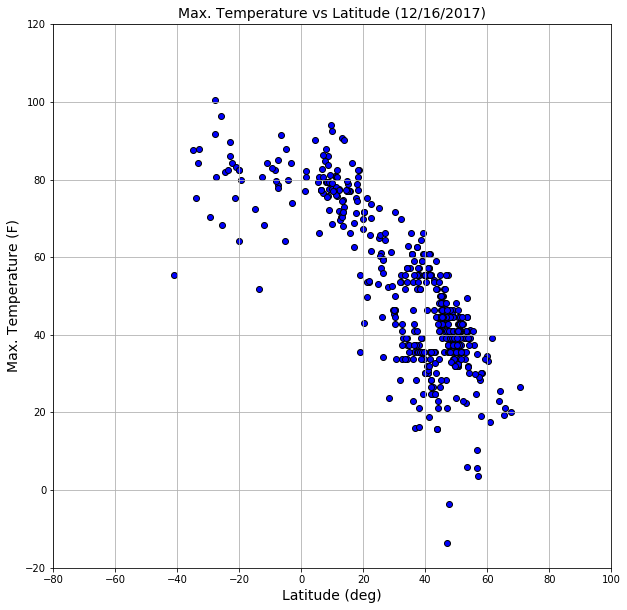

In [14]:
#Generate first plot of temp vs position.

plt.figure(figsize=(10,10))
plt.scatter(plot_data(city_df)[0], plot_data(city_df)[1], color='b', alpha = 1, edgecolors='black', linewidths=1)
plt.xlabel("Latitude (deg)" ,fontsize = 14)
plt.ylabel("Max. Temperature (F)", fontsize = 14)
plt.title("Max. Temperature vs Latitude (12/16/2017)", fontsize = 14)
plt.xlim(-80, 100, 10)
plt.ylim(-20, 120, 10)
plt.grid(True)
plt.show()

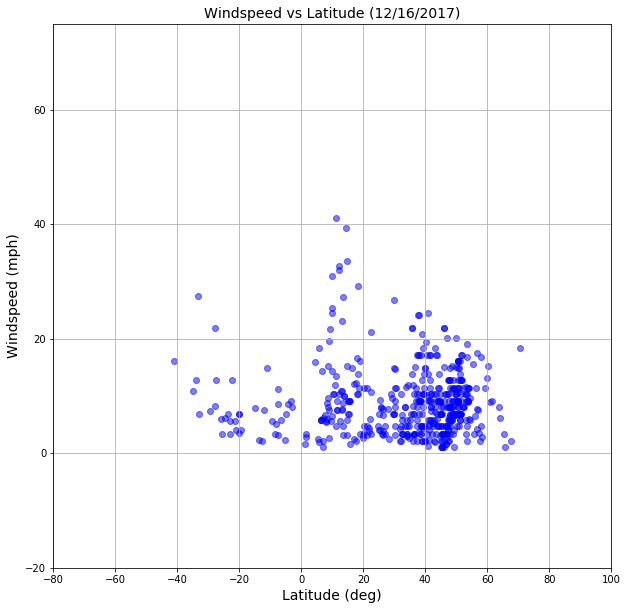

In [15]:
#Generate second plot of wind speed vs position.

plt.figure(figsize=(10,10))
plt.scatter(plot_data(city_df)[0], plot_data(city_df)[3], color='b', alpha = 0.5)
plt.xlabel("Latitude (deg)" ,fontsize = 14)
plt.ylabel("Windspeed (mph)", fontsize = 14)
plt.title("Windspeed vs Latitude (12/16/2017)", fontsize = 14)
plt.xlim(-80, 100, 10)
plt.ylim(-20, 75, 10)
plt.grid(True)
plt.show()

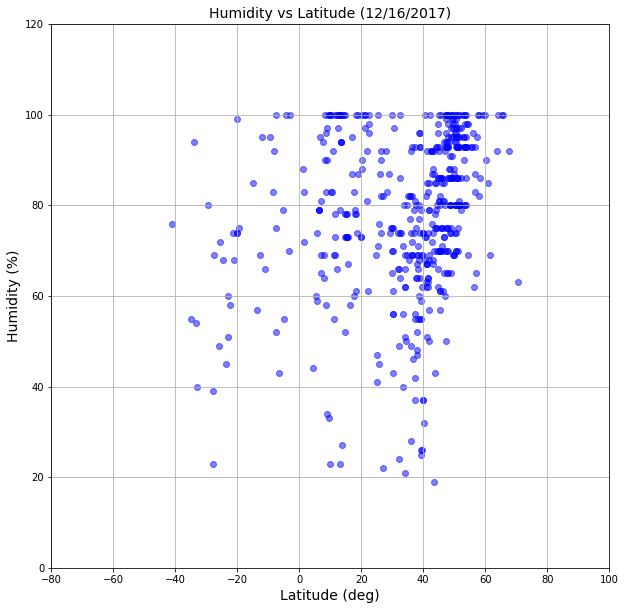

In [16]:
#Generate third plot of humidity vs position.

plt.figure(figsize=(10,10))
plt.scatter(plot_data(city_df)[0], plot_data(city_df)[2], color='b', alpha = 0.5)
plt.xlabel("Latitude (deg)" ,fontsize = 14)
plt.ylabel("Humidity (%)", fontsize = 14)
plt.title("Humidity vs Latitude (12/16/2017)", fontsize = 14)
plt.xlim(-80, 100, 10)
plt.ylim(0, 120, 10)
plt.grid(True)
plt.show()

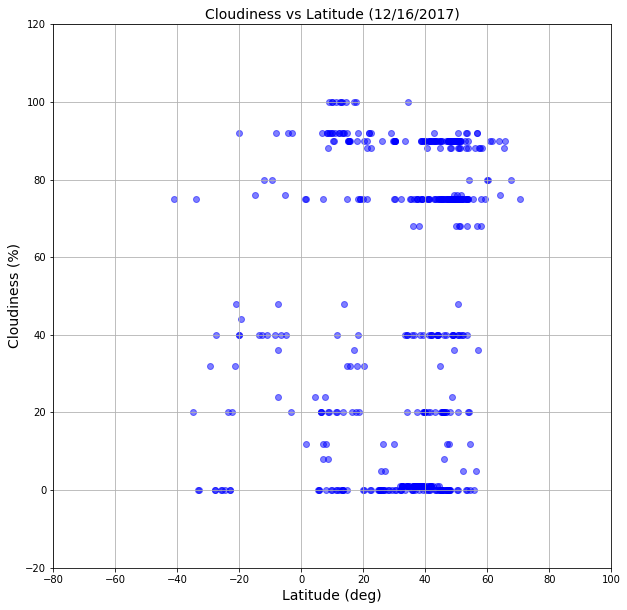

In [17]:
#Generate first plot of cloudiness vs position.

plt.figure(figsize=(10,10))
plt.scatter(plot_data(city_df)[0], plot_data(city_df)[4], color='b', alpha = 0.5)
plt.xlabel("Latitude (deg)" ,fontsize = 14)
plt.ylabel("Cloudiness (%)", fontsize = 14)
plt.title("Cloudiness vs Latitude (12/16/2017)", fontsize = 14)
plt.xlim(-80, 100, 10)
plt.ylim(-20, 120, 10)
plt.grid(True)
plt.show()